# Sentimental Analysis 

In [1]:
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline

## Elon's tweets before Twitter acquisition

In [2]:
tw_list = pd.read_csv('df_musk_2022.csv')

In [3]:
tw_list

,Unnamed: 0,Text,Date_New
0,0,the bird is freed,2022-10-28
1,1,Falcon rockets to orbit as seen from LA https:...,2022-10-28
2,2,@Gfilche @Twitter 🤣,2022-10-27
3,3,@PeterSchiff 🤣 thanks,2022-10-27
4,4,@ZubyMusic Absolutely,2022-10-27
...,...,...,...
3130,3130,https://t.co/LA9hPzVlGx,2022-01-02
3131,3131,Let’s make the roaring 20’s happen!,2022-01-02
3132,3132,Great work by Tesla team worldwide! https://t....,2022-01-02
3133,3133,@BLKMDL3 @Tesla 🔥,2022-01-01


In [4]:
tw_list.drop('Unnamed: 0', inplace=True, axis=1)

In [5]:
tw_list

,Text,Date_New
0,the bird is freed,2022-10-28
1,Falcon rockets to orbit as seen from LA https:...,2022-10-28
2,@Gfilche @Twitter 🤣,2022-10-27
3,@PeterSchiff 🤣 thanks,2022-10-27
4,@ZubyMusic Absolutely,2022-10-27
...,...,...
3130,https://t.co/LA9hPzVlGx,2022-01-02
3131,Let’s make the roaring 20’s happen!,2022-01-02
3132,Great work by Tesla team worldwide! https://t....,2022-01-02
3133,@BLKMDL3 @Tesla 🔥,2022-01-01


## Creating a Data Frame from tweets

In [6]:
#Data frame from Elons tweets clean
tw_list["tweet"] = tw_list['Text']

#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["tweet"] = tw_list.tweet.map(remove_rt).map(rt)
tw_list["tweet"] = tw_list.tweet.str.lower()
tw_list.head(10)

,Text,Date_New,tweet
0,the bird is freed,2022-10-28,the bird is freed
1,Falcon rockets to orbit as seen from LA https:...,2022-10-28,falcon rockets to orbit as seen from la
2,@Gfilche @Twitter 🤣,2022-10-27,
3,@PeterSchiff 🤣 thanks,2022-10-27,thanks
4,@ZubyMusic Absolutely,2022-10-27,absolutely
5,Dear Twitter Advertisers https://t.co/GMwHmInPAS,2022-10-27,dear twitter advertisers
6,@BillyM2k 👻,2022-10-27,
7,Meeting a lot of cool people at Twitter today!,2022-10-26,meeting a lot of cool people at twitter today
8,Entering Twitter HQ – let that sink in! https:...,2022-10-26,entering twitter hq let that sink in
9,@dogeofficialceo @mtaibbi 🤣💪,2022-10-26,


## TextBlob for sentimental Analysis

In [7]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [7]:
from textblob import TextBlob

In [8]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('tagsets')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\javie\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\javie\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\javie\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package tagsets to
[nltk_data]     C:\Users\javie\AppData\Roaming\nltk_data...
[nltk_data]   Package tagsets is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\javie\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [9]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [10]:
#Calculating Negative, Positive, Neutral and Compound values

tw_list[['polarity', 'subjectivity']] = tw_list['tweet'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['tweet'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp

tw_list.head(10)

,Text,Date_New,tweet,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,the bird is freed,2022-10-28,the bird is freed,0.00,0.00,positive,0.0,0.526,0.474,0.4019
1,Falcon rockets to orbit as seen from LA https:...,2022-10-28,falcon rockets to orbit as seen from la,0.00,0.00,neutral,0.0,1.000,0.000,0.0000
2,@Gfilche @Twitter 🤣,2022-10-27,,0.00,0.00,neutral,0.0,0.000,0.000,0.0000
3,@PeterSchiff 🤣 thanks,2022-10-27,thanks,0.20,0.20,positive,0.0,0.000,1.000,0.4404
4,@ZubyMusic Absolutely,2022-10-27,absolutely,0.20,0.90,neutral,0.0,1.000,0.000,0.0000
5,Dear Twitter Advertisers https://t.co/GMwHmInPAS,2022-10-27,dear twitter advertisers,0.00,0.00,positive,0.0,0.435,0.565,0.3818
6,@BillyM2k 👻,2022-10-27,,0.00,0.00,neutral,0.0,0.000,0.000,0.0000
7,Meeting a lot of cool people at Twitter today!,2022-10-26,meeting a lot of cool people at twitter today,0.35,0.65,positive,0.0,0.753,0.247,0.3182
8,Entering Twitter HQ – let that sink in! https:...,2022-10-26,entering twitter hq let that sink in,0.00,0.00,neutral,0.0,1.000,0.000,0.0000
9,@dogeofficialceo @mtaibbi 🤣💪,2022-10-26,,0.00,0.00,neutral,0.0,0.000,0.000,0.0000


In [11]:
tw_list['date']=pd.to_datetime(tw_list['Date_New'], format='%Y-%m-%d')
tw_list.head()

,Text,Date_New,tweet,polarity,subjectivity,sentiment,neg,neu,pos,compound,date
0,the bird is freed,2022-10-28,the bird is freed,0.0,0.0,positive,0.0,0.526,0.474,0.4019,2022-10-28
1,Falcon rockets to orbit as seen from LA https:...,2022-10-28,falcon rockets to orbit as seen from la,0.0,0.0,neutral,0.0,1.000,0.000,0.0000,2022-10-28
2,@Gfilche @Twitter 🤣,2022-10-27,,0.0,0.0,neutral,0.0,0.000,0.000,0.0000,2022-10-27
3,@PeterSchiff 🤣 thanks,2022-10-27,thanks,0.2,0.2,positive,0.0,0.000,1.000,0.4404,2022-10-27
4,@ZubyMusic Absolutely,2022-10-27,absolutely,0.2,0.9,neutral,0.0,1.000,0.000,0.0000,2022-10-27


In [12]:
tw_list.loc[tw_list['sentiment']=='negative']

,Text,Date_New,tweet,polarity,subjectivity,sentiment,neg,neu,pos,compound,date
16,"“The New York Times has emerged as a new, chao...",2022-10-26,the new york times has emerged as a new chao...,0.193182,0.352273,negative,0.192,0.808,0.000,-0.7642,2022-10-26
23,@VitalikButerin @balajis @zengjiajun_eth Had t...,2022-10-25,eth had to do a double take this is the...,-0.083333,0.444444,negative,0.154,0.846,0.000,-0.4767,2022-10-25
46,@spideycyp_155 @SquawkCNBC @Kasparov63 I did a...,2022-10-24,155 i did as a child but found it to be...,0.062500,0.379018,negative,0.239,0.694,0.067,-0.8720,2022-10-24
47,@SquawkCNBC @Kasparov63 And I don’t even own a...,2022-10-24,and i don t even own a house let alone a ...,0.600000,1.000000,negative,0.360,0.640,0.000,-0.5423,2022-10-24
53,@Teslarati @Writer_01001101 Before DoD even ca...,2022-10-24,01001101 before dod even came back with an...,0.000000,0.000000,negative,0.087,0.913,0.000,-0.2960,2022-10-24
...,...,...,...,...,...,...,...,...,...,...,...
3104,@APompliano If the alarming collapse in birth ...,2022-01-10,if the alarming collapse in birth rate conti...,0.000000,0.450000,negative,0.381,0.619,0.000,-0.8225,2022-01-10
3109,@WholeMarsBlog It was a mistake to try to use ...,2022-01-07,it was a mistake to try to use the elise in...,0.000000,0.800000,negative,0.085,0.915,0.000,-0.3400,2022-01-07
3124,@wintonARK Absolutely. This is just bad math.,2022-01-03,absolutely this is just bad math,-0.250000,0.783333,negative,0.412,0.588,0.000,-0.5423,2022-01-03
3126,Raptor 2 now operates routinely at 300 bar mai...,2022-01-03,raptor 2 now operates routinely at 300 bar mai...,0.166667,0.333333,negative,0.196,0.804,0.000,-0.2960,2022-01-03


In [13]:
tw_list.describe()

,polarity,subjectivity,neg,neu,pos,compound
count,3135.000000,3135.000000,3135.000000,3135.000000,3135.000000,3135.000000
mean,0.105295,0.308521,0.054423,0.640924,0.177697,0.121672
std,0.255713,0.320877,0.133518,0.368996,0.277586,0.350103
min,-1.000000,0.000000,0.000000,0.000000,0.000000,-0.951000
25%,0.000000,0.000000,0.000000,0.397500,0.000000,0.000000
50%,0.000000,0.250000,0.000000,0.753000,0.000000,0.000000
75%,0.202722,0.560208,0.000000,1.000000,0.257500,0.401900
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.959500


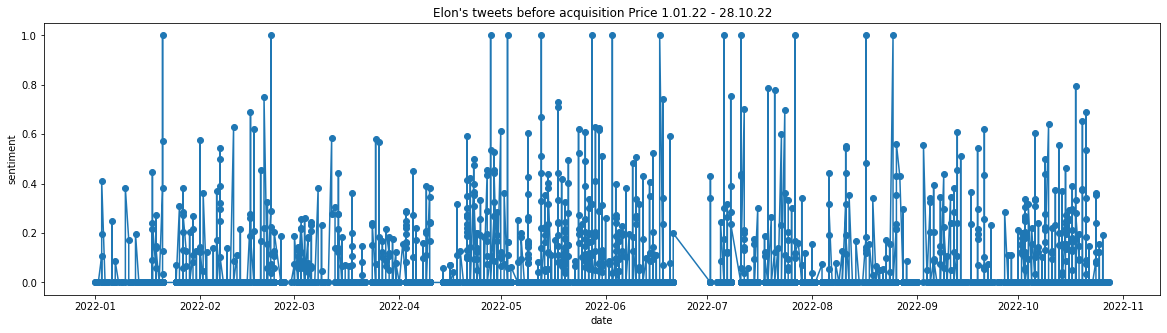

In [39]:
s1mask = np.isfinite(tw_list['neg']) #to skip missing values (only works for int)

plt.figure(figsize=(20,5))
plt.plot_date(tw_list['date'], tw_list['neg'] ,linestyle ='solid')

plt.xlabel("date")
plt.ylabel("sentiment")
plt.title("Elon's tweets before acquisition Price 1.01.22 - 28.10.22");

In [43]:
tw_list.to_csv('Elon_tweets_before.csv')

## Tesla stock value

In [46]:
tesla_stock= pd.read_csv('Data/tesla_stock2022.csv')
tesla_stock.head()

,Unnamed: 0,close,high,low,open,date
0,2022-01-03,399.927,400.357,378.680,382.583,2022-01-03
1,2022-01-04,383.197,402.667,374.350,396.517,2022-01-04
2,2022-01-05,362.707,390.113,360.337,382.217,2022-01-05
3,2022-01-06,354.900,362.667,340.167,359.000,2022-01-06
4,2022-01-07,342.320,360.310,336.667,360.123,2022-01-07


In [47]:
tesla_stock['date']=pd.to_datetime(tesla_stock['date'], format='%Y-%m-%d')
tesla_stock.head()

,Unnamed: 0,close,high,low,open,date
0,2022-01-03,399.927,400.357,378.680,382.583,2022-01-03
1,2022-01-04,383.197,402.667,374.350,396.517,2022-01-04
2,2022-01-05,362.707,390.113,360.337,382.217,2022-01-05
3,2022-01-06,354.900,362.667,340.167,359.000,2022-01-06
4,2022-01-07,342.320,360.310,336.667,360.123,2022-01-07


In [48]:
stock_tweet = pd.merge(tesla_stock,tw_list,on="date",how="inner")
stock_tweet.head()

,Unnamed: 0,close,high,low,open,date,Text,Date_New,tweet,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,2022-01-03,399.927,400.357,378.68,382.583,2022-01-03,@wintonARK Absolutely. This is just bad math.,2022-01-03,absolutely this is just bad math,-0.250000,0.783333,negative,0.412,0.588,0.00,-0.5423
1,2022-01-03,399.927,400.357,378.68,382.583,2022-01-03,@nextspaceflight @BocaChicaGal Yes,2022-01-03,yes,0.000000,0.000000,positive,0.000,0.000,1.00,0.4019
2,2022-01-03,399.927,400.357,378.68,382.583,2022-01-03,Raptor 2 now operates routinely at 300 bar mai...,2022-01-03,raptor 2 now operates routinely at 300 bar mai...,0.166667,0.333333,negative,0.196,0.804,0.00,-0.2960
3,2022-01-03,399.927,400.357,378.68,382.583,2022-01-03,@jack Reminds me of when I hex edited Ultima V...,2022-01-03,reminds me of when i hex edited ultima v to ...,0.000000,1.000000,neutral,0.000,1.000,0.00,0.0000
4,2022-01-03,399.927,400.357,378.68,382.583,2022-01-03,@ClaudioOmbrella @Tesla @slcuervo @alex_avoigt...,2022-01-03,avoigt yay switzerland,0.000000,0.000000,positive,0.000,0.370,0.63,0.5267


In [49]:
stock_tweet = stock_tweet[['date','tweet','close','polarity','subjectivity','neg','neu','pos','compound','sentiment']]
stock_tweet.head()

,date,tweet,close,polarity,subjectivity,neg,neu,pos,compound,sentiment
0,2022-01-03,absolutely this is just bad math,399.927,-0.250000,0.783333,0.412,0.588,0.00,-0.5423,negative
1,2022-01-03,yes,399.927,0.000000,0.000000,0.000,0.000,1.00,0.4019,positive
2,2022-01-03,raptor 2 now operates routinely at 300 bar mai...,399.927,0.166667,0.333333,0.196,0.804,0.00,-0.2960,negative
3,2022-01-03,reminds me of when i hex edited ultima v to ...,399.927,0.000000,1.000000,0.000,1.000,0.00,0.0000,neutral
4,2022-01-03,avoigt yay switzerland,399.927,0.000000,0.000000,0.000,0.370,0.63,0.5267,positive


In [50]:
stock_tweet

,date,tweet,close,polarity,subjectivity,neg,neu,pos,compound,sentiment
0,2022-01-03,absolutely this is just bad math,399.927,-0.250000,0.783333,0.412,0.588,0.000,-0.5423,negative
1,2022-01-03,yes,399.927,0.000000,0.000000,0.000,0.000,1.000,0.4019,positive
2,2022-01-03,raptor 2 now operates routinely at 300 bar mai...,399.927,0.166667,0.333333,0.196,0.804,0.000,-0.2960,negative
3,2022-01-03,reminds me of when i hex edited ultima v to ...,399.927,0.000000,1.000000,0.000,1.000,0.000,0.0000,neutral
4,2022-01-03,avoigt yay switzerland,399.927,0.000000,0.000000,0.000,0.370,0.630,0.5267,positive
...,...,...,...,...,...,...,...,...,...,...
2206,2022-10-27,absolutely,225.090,0.200000,0.900000,0.000,1.000,0.000,0.0000,neutral
2207,2022-10-27,dear twitter advertisers,225.090,0.000000,0.000000,0.000,0.435,0.565,0.3818,positive
2208,2022-10-27,,225.090,0.000000,0.000000,0.000,0.000,0.000,0.0000,neutral
2209,2022-10-28,the bird is freed,228.520,0.000000,0.000000,0.000,0.526,0.474,0.4019,positive


In [51]:
stock_comp= stock_tweet.groupby(['date','close'])['polarity','subjectivity','neg','neu','pos','compound'].mean()
#stock_comp=stock_comp.to_frame()
stock_comp=stock_comp.reset_index()
stock_comp

C:\Users\javie\AppData\Local\Temp/ipykernel_21520/1490080670.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  stock_comp= stock_tweet.groupby(['date','close'])['polarity','subjectivity','neg','neu','pos','compound'].mean()


,date,close,polarity,subjectivity,neg,neu,pos,compound
0,2022-01-03,399.927,-0.013889,0.352778,0.119500,0.608833,0.271667,-0.034283
1,2022-01-04,383.197,0.166667,0.166667,0.000000,0.666667,0.000000,0.000000
2,2022-01-05,362.707,0.000000,0.000000,0.000000,0.204000,0.296000,0.220200
3,2022-01-06,354.900,0.350000,0.437500,0.062500,0.592500,0.345000,0.190375
4,2022-01-07,342.320,0.000119,0.252976,0.014167,0.969500,0.016333,0.003533
...,...,...,...,...,...,...,...,...
186,2022-10-24,211.250,0.151534,0.382190,0.062100,0.510500,0.227350,0.108305
187,2022-10-25,222.415,0.035883,0.152297,0.021385,0.526462,0.144462,0.107638
188,2022-10-26,224.640,0.099513,0.156412,0.013714,0.603857,0.168143,0.146464
189,2022-10-27,225.090,0.080000,0.220000,0.000000,0.287000,0.313000,0.164440


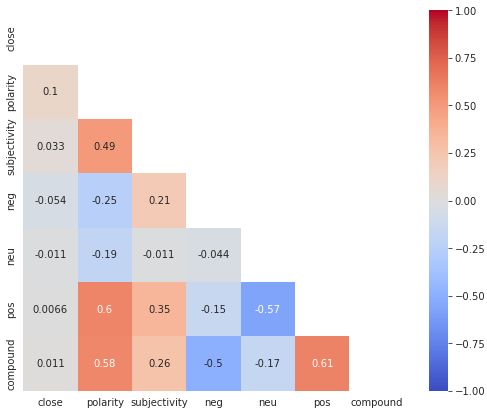

In [52]:
corr = stock_comp.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 7))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

In [53]:
#DataFrame to csv
stock_comp.to_csv('Tesla_Elon_stock.csv')

## Elon's tweet after Twitter acquisition

In [14]:
tw_aft = pd.read_csv('musk_new.csv')

In [15]:
tw_aft.head()

,Unnamed: 0,Text,Date_New
0,0,Woke v Woke https://t.co/hmhC5eelik,2022-12-08
1,1,@EthanBitcoin @dergigi lol,2022-12-08
2,2,@EddieZipperer https://t.co/92voOIH5d8,2022-12-08
3,3,RT @teslaownersSV: Tesla Semi is super quiet w...,2022-12-08
4,4,RT @SpaceX: Teams completed additional vehicle...,2022-12-07


In [16]:
tw_aft.drop('Unnamed: 0', inplace=True, axis=1)
tw_aft.head()

,Text,Date_New
0,Woke v Woke https://t.co/hmhC5eelik,2022-12-08
1,@EthanBitcoin @dergigi lol,2022-12-08
2,@EddieZipperer https://t.co/92voOIH5d8,2022-12-08
3,RT @teslaownersSV: Tesla Semi is super quiet w...,2022-12-08
4,RT @SpaceX: Teams completed additional vehicle...,2022-12-07


In [17]:
#Data frame from Elons tweets clean
tw_aft["tweet"] = tw_aft['Text']

#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_aft["tweet"] = tw_aft.tweet.map(remove_rt).map(rt)
tw_aft["tweet"] = tw_aft.tweet.str.lower()
tw_aft.head(10)

,Text,Date_New,tweet
0,Woke v Woke https://t.co/hmhC5eelik,2022-12-08,woke v woke
1,@EthanBitcoin @dergigi lol,2022-12-08,lol
2,@EddieZipperer https://t.co/92voOIH5d8,2022-12-08,
3,RT @teslaownersSV: Tesla Semi is super quiet w...,2022-12-08,tesla semi is super quiet while pulling the f...
4,RT @SpaceX: Teams completed additional vehicle...,2022-12-07,teams completed additional vehicle inspection...
5,@ChrisJBakke 🤣🤣,2022-12-07,
6,@jack Most important data was hidden (from you...,2022-12-07,most important data was hidden from you too...
7,@BoeingAirplanes One of the best aircraft ever,2022-12-07,one of the best aircraft ever
8,@karpathy 🔥🤣,2022-12-07,
9,"Oh, you know, keeping busy … https://t.co/jgGY...",2022-12-07,oh you know keeping busy


In [18]:
#Calculating Negative, Positive, Neutral and Compound values

tw_aft[['polarity', 'subjectivity']] = tw_aft['tweet'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_aft['tweet'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_aft.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_aft.loc[index, 'sentiment'] = "positive"
    else:
        tw_aft.loc[index, 'sentiment'] = "neutral"
    tw_aft.loc[index, 'neg'] = neg
    tw_aft.loc[index, 'neu'] = neu
    tw_aft.loc[index, 'pos'] = pos
    tw_aft.loc[index, 'compound'] = comp

tw_aft.head(10)

,Text,Date_New,tweet,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,Woke v Woke https://t.co/hmhC5eelik,2022-12-08,woke v woke,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
1,@EthanBitcoin @dergigi lol,2022-12-08,lol,0.800000,0.700000,positive,0.000,0.000,1.000,0.4215
2,@EddieZipperer https://t.co/92voOIH5d8,2022-12-08,,0.000000,0.000000,neutral,0.000,0.000,0.000,0.0000
3,RT @teslaownersSV: Tesla Semi is super quiet w...,2022-12-08,tesla semi is super quiet while pulling the f...,-0.083333,0.625000,positive,0.163,0.600,0.237,0.4939
4,RT @SpaceX: Teams completed additional vehicle...,2022-12-07,teams completed additional vehicle inspection...,0.700000,0.600000,positive,0.000,0.854,0.146,0.4404
5,@ChrisJBakke 🤣🤣,2022-12-07,,0.000000,0.000000,neutral,0.000,0.000,0.000,0.0000
6,@jack Most important data was hidden (from you...,2022-12-07,most important data was hidden from you too...,0.244444,0.611111,positive,0.000,0.928,0.072,0.1397
7,@BoeingAirplanes One of the best aircraft ever,2022-12-07,one of the best aircraft ever,1.000000,0.300000,positive,0.000,0.543,0.457,0.6369
8,@karpathy 🔥🤣,2022-12-07,,0.000000,0.000000,neutral,0.000,0.000,0.000,0.0000
9,"Oh, you know, keeping busy … https://t.co/jgGY...",2022-12-07,oh you know keeping busy,0.100000,0.300000,neutral,0.000,1.000,0.000,0.0000


In [19]:
tw_aft['date']=pd.to_datetime(tw_aft['Date_New'], format='%Y-%m-%d')
tw_aft.head()

,Text,Date_New,tweet,polarity,subjectivity,sentiment,neg,neu,pos,compound,date
0,Woke v Woke https://t.co/hmhC5eelik,2022-12-08,woke v woke,0.000000,0.000,neutral,0.000,1.000,0.000,0.0000,2022-12-08
1,@EthanBitcoin @dergigi lol,2022-12-08,lol,0.800000,0.700,positive,0.000,0.000,1.000,0.4215,2022-12-08
2,@EddieZipperer https://t.co/92voOIH5d8,2022-12-08,,0.000000,0.000,neutral,0.000,0.000,0.000,0.0000,2022-12-08
3,RT @teslaownersSV: Tesla Semi is super quiet w...,2022-12-08,tesla semi is super quiet while pulling the f...,-0.083333,0.625,positive,0.163,0.600,0.237,0.4939,2022-12-08
4,RT @SpaceX: Teams completed additional vehicle...,2022-12-07,teams completed additional vehicle inspection...,0.700000,0.600,positive,0.000,0.854,0.146,0.4404,2022-12-07


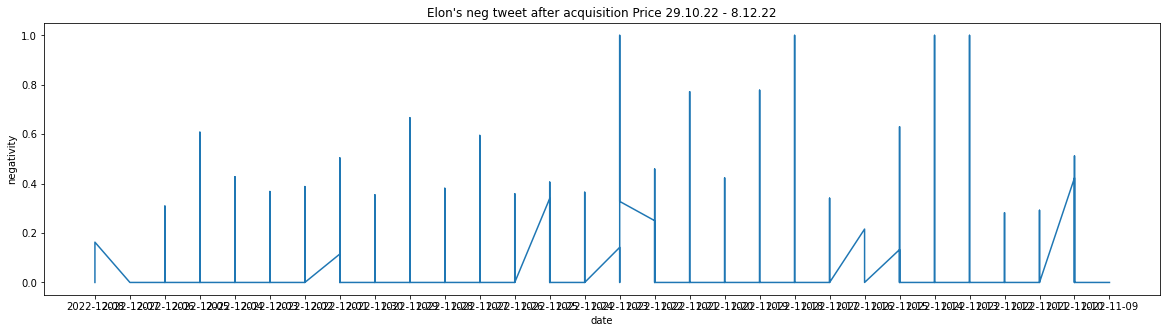

In [42]:
plt.figure(figsize=(20,5))
plt.plot(tw_aft['Date_New'], tw_aft['neg'])
plt.xlabel("date")
plt.ylabel("negativity")
plt.title("Elon's neg tweet after acquisition Price 29.10.22 - 8.12.22");

In [51]:
#DataFrame to csv
tw_aft.to_csv('Elon_tweets_after.csv')

## Tesla tweets

In [40]:
tesla_tw = pd.read_csv('Hashtag_Tesla_Tweets_CAT.csv')
tesla_tw.head()

,Unnamed: 0,Twitter ID,Date,tweet,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,0,@Jessica1988kk,2022-04-10,crypto news bitcoin whales flying motorbik...,0.318182,0.500,positive,0.000,0.862,0.138,0.4939
1,1,@JotaGe2014,2022-04-10,tesla tiene r cord de autos vendidos es impr...,0.000000,0.000,negative,0.084,0.916,0.000,-0.2960
2,2,@MmeCallas,2022-04-10,love in my mariacallas i know y art hold...,0.425000,0.625,positive,0.000,0.787,0.213,0.7650
3,3,@BotSecx,2022-04-10,love in my mariacallas i know y art hold...,0.425000,0.625,positive,0.000,0.787,0.213,0.7650
4,4,@agseh,2022-04-10,al que le robaron las llantas del tesl...,0.000000,0.000,neutral,0.000,1.000,0.000,0.0000


In [41]:
tesla_tw.drop('Unnamed: 0', inplace=True, axis=1)
tesla_tw.head()

,Twitter ID,Date,tweet,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,@Jessica1988kk,2022-04-10,crypto news bitcoin whales flying motorbik...,0.318182,0.500,positive,0.000,0.862,0.138,0.4939
1,@JotaGe2014,2022-04-10,tesla tiene r cord de autos vendidos es impr...,0.000000,0.000,negative,0.084,0.916,0.000,-0.2960
2,@MmeCallas,2022-04-10,love in my mariacallas i know y art hold...,0.425000,0.625,positive,0.000,0.787,0.213,0.7650
3,@BotSecx,2022-04-10,love in my mariacallas i know y art hold...,0.425000,0.625,positive,0.000,0.787,0.213,0.7650
4,@agseh,2022-04-10,al que le robaron las llantas del tesl...,0.000000,0.000,neutral,0.000,1.000,0.000,0.0000


In [65]:
tesla_tw.loc[tesla_tw['sentiment']=='negative']

,Twitter ID,date,tweet,polarity,subjectivity,sentiment,neg,neu,pos,compound
1,@JotaGe2014,2022-04-10,tesla tiene r cord de autos vendidos es impr...,0.000000,0.000000,negative,0.084,0.916,0.0,-0.2960
11,@TeslaradarB,2022-04-10,bada bing carinasteslatray just spotted a 201...,0.325000,0.433333,negative,0.091,0.909,0.0,-0.2960
13,@TeslaradarB,2022-04-10,kazaam carinasteslatray was first to spot a y...,0.250000,0.333333,negative,0.121,0.879,0.0,-0.2960
36,@KrishnaM29,2022-04-10,i don t think some tweets are a direct refle...,0.100000,0.400000,negative,0.156,0.844,0.0,-0.3400
37,@Commuternyc,2022-04-10,your bull argument is to buy the stock becau...,-0.172917,0.304167,negative,0.168,0.832,0.0,-0.8074
...,...,...,...,...,...,...,...,...,...,...
151994,@DirkStutzki,2022-11-12,erinnert ihr euch als ein kfz aus reinem ...,0.000000,0.000000,negative,0.206,0.794,0.0,-0.9136
151995,@FolgendenFolgen,2022-11-12,erinnert ihr euch als ein kfz aus reinem ...,0.000000,0.000000,negative,0.206,0.794,0.0,-0.9136
151996,@kerntdennis,2022-11-12,erinnert ihr euch als ein kfz aus reinem ...,0.000000,0.000000,negative,0.206,0.794,0.0,-0.9136
151997,@kadiff651,2022-11-12,erinnert ihr euch als ein kfz aus reinem ...,0.000000,0.000000,negative,0.206,0.794,0.0,-0.9136


In [43]:
tesla_tw.rename(columns = {'Date':'date'}, inplace = True)

In [44]:
tesla_tw['date']=pd.to_datetime(tesla_tw['date'], format='%Y-%m-%d')

In [54]:
tesla_tw_stock = pd.merge(tesla_stock,tesla_tw,on="date",how="inner")
tesla_tw_stock.head()

,Unnamed: 0,close,high,low,open,date,Twitter ID,tweet,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,2022-04-11,325.31,336.156,324.88,326.8,2022-04-11,@JervisCapital,tesla s 5 big lies from battery day less...,-0.188889,0.255556,negative,0.074,0.873,0.053,-0.2023
1,2022-04-11,325.31,336.156,324.88,326.8,2022-04-11,@JervisCapital,lie 1 tesla s internal cell production wi...,0.000000,0.000000,positive,0.042,0.886,0.072,0.1027
2,2022-04-11,325.31,336.156,324.88,326.8,2022-04-11,@JervisCapital,lie 2 tesla s 4680 cells are revolutionary ...,0.000000,0.125000,positive,0.000,0.862,0.138,0.5859
3,2022-04-11,325.31,336.156,324.88,326.8,2022-04-11,@SimonB76193881,the power of tesla fremont will be shown in q...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
4,2022-04-11,325.31,336.156,324.88,326.8,2022-04-11,@burrosavic,i ve been to a lot of parties this was one o...,0.750000,0.594444,positive,0.000,0.588,0.412,0.8979


In [55]:
tesla_tw_stock = tesla_tw_stock[['date','tweet','open','close','polarity','subjectivity','neg','neu','pos','compound','sentiment']]
tesla_tw_stock.head()

,date,tweet,open,close,polarity,subjectivity,neg,neu,pos,compound,sentiment
0,2022-04-11,tesla s 5 big lies from battery day less...,326.8,325.31,-0.188889,0.255556,0.074,0.873,0.053,-0.2023,negative
1,2022-04-11,lie 1 tesla s internal cell production wi...,326.8,325.31,0.000000,0.000000,0.042,0.886,0.072,0.1027,positive
2,2022-04-11,lie 2 tesla s 4680 cells are revolutionary ...,326.8,325.31,0.000000,0.125000,0.000,0.862,0.138,0.5859,positive
3,2022-04-11,the power of tesla fremont will be shown in q...,326.8,325.31,0.000000,0.000000,0.000,1.000,0.000,0.0000,neutral
4,2022-04-11,i ve been to a lot of parties this was one o...,326.8,325.31,0.750000,0.594444,0.000,0.588,0.412,0.8979,positive


In [56]:
tesla_tw_stock.describe()

,open,close,polarity,subjectivity,neg,neu,pos,compound
count,104557.000000,104557.000000,104557.000000,104557.000000,104557.000000,104557.000000,104557.000000,104557.000000
mean,261.560399,260.582389,0.089903,0.279247,0.036553,0.882312,0.081119,0.128034
std,38.533050,38.032660,0.233210,0.299661,0.076254,0.131030,0.111923,0.402180
min,186.000000,177.590000,-1.000000,0.000000,0.000000,0.000000,0.000000,-0.983400
25%,229.500000,228.520000,0.000000,0.000000,0.000000,0.801000,0.000000,0.000000
50%,254.500000,252.753000,0.000000,0.216667,0.000000,0.912000,0.000000,0.000000
75%,295.000000,292.140000,0.196104,0.500000,0.042000,1.000000,0.137000,0.421500
max,358.243000,342.717000,1.000000,1.000000,1.000000,1.000000,0.867000,0.990000


In [57]:
tesla_tw_stock= tesla_tw_stock.groupby(['date','open','close'])['polarity','subjectivity','neg','neu','pos','compound'].mean()
tesla_tw_stock=tesla_tw_stock.reset_index()
tesla_tw_stock

C:\Users\javie\AppData\Local\Temp/ipykernel_21520/56285633.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  tesla_tw_stock= tesla_tw_stock.groupby(['date','open','close'])['polarity','subjectivity','neg','neu','pos','compound'].mean()


,date,open,close,polarity,subjectivity,neg,neu,pos,compound
0,2022-04-11,326.800,325.310,0.088006,0.280926,0.027053,0.879300,0.093649,0.206849
1,2022-04-12,332.547,328.983,0.104671,0.292057,0.030911,0.876903,0.092189,0.185046
2,2022-04-13,327.025,340.790,0.099795,0.313879,0.035191,0.880776,0.084012,0.139801
3,2022-04-14,333.097,328.333,0.067711,0.279761,0.061231,0.859106,0.079656,0.094391
4,2022-04-18,329.677,334.763,0.118878,0.282176,0.025993,0.866487,0.107513,0.219178
...,...,...,...,...,...,...,...,...,...
143,2022-11-07,208.650,197.080,0.067348,0.271531,0.043519,0.865306,0.091154,0.120413
144,2022-11-08,194.020,191.300,0.075518,0.308039,0.046128,0.872000,0.081850,0.087291
145,2022-11-09,190.775,177.590,0.060422,0.224464,0.050599,0.878974,0.070418,0.056075
146,2022-11-10,189.900,190.720,0.102952,0.280519,0.043643,0.883635,0.072722,0.108611


In [58]:
tesla_tw_stock['change']=tesla_tw_stock['close']-tesla_tw_stock['open']
tesla_tw_stock.head()

,date,open,close,polarity,subjectivity,neg,neu,pos,compound,change
0,2022-04-11,326.800,325.310,0.088006,0.280926,0.027053,0.879300,0.093649,0.206849,-1.490
1,2022-04-12,332.547,328.983,0.104671,0.292057,0.030911,0.876903,0.092189,0.185046,-3.564
2,2022-04-13,327.025,340.790,0.099795,0.313879,0.035191,0.880776,0.084012,0.139801,13.765
3,2022-04-14,333.097,328.333,0.067711,0.279761,0.061231,0.859106,0.079656,0.094391,-4.764
4,2022-04-18,329.677,334.763,0.118878,0.282176,0.025993,0.866487,0.107513,0.219178,5.086


In [59]:
tesla_tw_stock=tesla_tw_stock.reset_index()
tesla_tw_stock

,index,date,open,close,polarity,subjectivity,neg,neu,pos,compound,change
0,0,2022-04-11,326.800,325.310,0.088006,0.280926,0.027053,0.879300,0.093649,0.206849,-1.490
1,1,2022-04-12,332.547,328.983,0.104671,0.292057,0.030911,0.876903,0.092189,0.185046,-3.564
2,2,2022-04-13,327.025,340.790,0.099795,0.313879,0.035191,0.880776,0.084012,0.139801,13.765
3,3,2022-04-14,333.097,328.333,0.067711,0.279761,0.061231,0.859106,0.079656,0.094391,-4.764
4,4,2022-04-18,329.677,334.763,0.118878,0.282176,0.025993,0.866487,0.107513,0.219178,5.086
...,...,...,...,...,...,...,...,...,...,...,...
143,143,2022-11-07,208.650,197.080,0.067348,0.271531,0.043519,0.865306,0.091154,0.120413,-11.570
144,144,2022-11-08,194.020,191.300,0.075518,0.308039,0.046128,0.872000,0.081850,0.087291,-2.720
145,145,2022-11-09,190.775,177.590,0.060422,0.224464,0.050599,0.878974,0.070418,0.056075,-13.185
146,146,2022-11-10,189.900,190.720,0.102952,0.280519,0.043643,0.883635,0.072722,0.108611,0.820


In [60]:
numerical = tesla_tw_stock[['index','open','close','polarity','subjectivity','neg','neu','pos','compound','change']]
numerical.head()

,index,open,close,polarity,subjectivity,neg,neu,pos,compound,change
0,0,326.800,325.310,0.088006,0.280926,0.027053,0.879300,0.093649,0.206849,-1.490
1,1,332.547,328.983,0.104671,0.292057,0.030911,0.876903,0.092189,0.185046,-3.564
2,2,327.025,340.790,0.099795,0.313879,0.035191,0.880776,0.084012,0.139801,13.765
3,3,333.097,328.333,0.067711,0.279761,0.061231,0.859106,0.079656,0.094391,-4.764
4,4,329.677,334.763,0.118878,0.282176,0.025993,0.866487,0.107513,0.219178,5.086


In [61]:
#Label stock change by "up & down"
tesla_tw_stock['diection']= ['up' if change > 0 else 'down' for change in tesla_tw_stock['change']]
tesla_tw_stock.head()

,index,date,open,close,polarity,subjectivity,neg,neu,pos,compound,change,diection
0,0,2022-04-11,326.800,325.310,0.088006,0.280926,0.027053,0.879300,0.093649,0.206849,-1.490,down
1,1,2022-04-12,332.547,328.983,0.104671,0.292057,0.030911,0.876903,0.092189,0.185046,-3.564,down
2,2,2022-04-13,327.025,340.790,0.099795,0.313879,0.035191,0.880776,0.084012,0.139801,13.765,up
3,3,2022-04-14,333.097,328.333,0.067711,0.279761,0.061231,0.859106,0.079656,0.094391,-4.764,down
4,4,2022-04-18,329.677,334.763,0.118878,0.282176,0.025993,0.866487,0.107513,0.219178,5.086,up


In [62]:
tesla_tw_stock.drop('index', inplace=True, axis=1)

In [63]:
tesla_tw_stock.head()

,date,open,close,polarity,subjectivity,neg,neu,pos,compound,change,diection
0,2022-04-11,326.800,325.310,0.088006,0.280926,0.027053,0.879300,0.093649,0.206849,-1.490,down
1,2022-04-12,332.547,328.983,0.104671,0.292057,0.030911,0.876903,0.092189,0.185046,-3.564,down
2,2022-04-13,327.025,340.790,0.099795,0.313879,0.035191,0.880776,0.084012,0.139801,13.765,up
3,2022-04-14,333.097,328.333,0.067711,0.279761,0.061231,0.859106,0.079656,0.094391,-4.764,down
4,2022-04-18,329.677,334.763,0.118878,0.282176,0.025993,0.866487,0.107513,0.219178,5.086,up


In [64]:
tesla_tw_stock.to_csv('Tesla_tweet_stock.csv')

# Elon tweets 2022 w Sentiment

In [31]:
#Concatenate 2 Data frames (After and before Twitter acquisition)

frames = [tw_list,tw_aft]
elon_tws= pd.concat(frames)
elon_tws= elon_tws.sort_values('date')
elon_tws=elon_tws.reset_index(drop=True)
elon_tws

,Text,Date_New,tweet,polarity,subjectivity,sentiment,neg,neu,pos,compound,date
0,@MiFSDBetaTester @WholeMarsBlog 🤣,2022-01-01,,0.000000,0.000,neutral,0.000,0.000,0.000,0.0000,2022-01-01
1,@BLKMDL3 @Tesla 🔥,2022-01-01,,0.000000,0.000,neutral,0.000,0.000,0.000,0.0000,2022-01-01
2,Great work by Tesla team worldwide! https://t....,2022-01-02,great work by tesla team worldwide,0.800000,0.750,positive,0.000,0.549,0.451,0.6249,2022-01-02
3,Let’s make the roaring 20’s happen!,2022-01-02,let s make the roaring 20 s happen,0.000000,0.000,neutral,0.000,1.000,0.000,0.0000,2022-01-02
4,https://t.co/LA9hPzVlGx,2022-01-02,,0.000000,0.000,neutral,0.000,0.000,0.000,0.0000,2022-01-02
...,...,...,...,...,...,...,...,...,...,...,...
4043,"@ESYudkowsky To be called AGI, it needs to inv...",2022-12-07,to be called agi it needs to invent amazing...,0.550000,0.700,positive,0.000,0.817,0.183,0.5859,2022-12-07
4044,RT @teslaownersSV: Tesla Semi is super quiet w...,2022-12-08,tesla semi is super quiet while pulling the f...,-0.083333,0.625,positive,0.163,0.600,0.237,0.4939,2022-12-08
4045,@EddieZipperer https://t.co/92voOIH5d8,2022-12-08,,0.000000,0.000,neutral,0.000,0.000,0.000,0.0000,2022-12-08
4046,@EthanBitcoin @dergigi lol,2022-12-08,lol,0.800000,0.700,positive,0.000,0.000,1.000,0.4215,2022-12-08


In [36]:
elon_tws = elon_tws[['Date_New','polarity','subjectivity','neg','neu','pos','compound']]
elon_tws.head()

,Date_New,polarity,subjectivity,neg,neu,pos,compound
0,2022-01-01,0.0,0.00,0.0,0.000,0.000,0.0000
1,2022-01-01,0.0,0.00,0.0,0.000,0.000,0.0000
2,2022-01-02,0.8,0.75,0.0,0.549,0.451,0.6249
3,2022-01-02,0.0,0.00,0.0,1.000,0.000,0.0000
4,2022-01-02,0.0,0.00,0.0,0.000,0.000,0.0000


In [38]:
elon_tws= elon_tws.groupby(['Date_New'])['polarity','subjectivity','neg','neu','pos','compound'].mean()
elon_tws

C:\Users\javie\AppData\Local\Temp/ipykernel_21520/856924661.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  elon_tws= elon_tws.groupby(['Date_New'])['polarity','subjectivity','neg','neu','pos','compound'].mean()


,polarity,subjectivity,neg,neu,pos,compound
Date_New,,,,,,
2022-01-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2022-01-02,0.266667,0.250000,0.000000,0.516333,0.150333,0.208300
2022-01-03,-0.013889,0.352778,0.119500,0.608833,0.271667,-0.034283
2022-01-04,0.166667,0.166667,0.000000,0.666667,0.000000,0.000000
2022-01-05,0.000000,0.000000,0.000000,0.204000,0.296000,0.220200
...,...,...,...,...,...,...
2022-12-04,0.069437,0.194878,0.034065,0.683355,0.153548,0.164700
2022-12-05,0.046962,0.234462,0.042417,0.777292,0.096958,0.028371
2022-12-06,0.084167,0.522292,0.052125,0.619500,0.203375,0.045363


In [39]:
#DataFrame to csv
elon_tws.to_csv('2022_Ellon_tweets_sentimental.csv')

## NLKT

In [8]:
#pip install nltk

In [8]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('tagsets')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\javie\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\javie\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\javie\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package tagsets to
[nltk_data]     C:\Users\javie\AppData\Roaming\nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


True

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3135 entries, 0 to 3134
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      3135 non-null   object
 1   Date_New  3135 non-null   object
dtypes: object(2)
memory usage: 49.1+ KB


### Length of each tweet

In [10]:
df['length'] = list(map(lambda x: len(str(x).split()), df['Text']))

In [11]:
df.head()

,Text,Date_New,length
0,the bird is freed,2022-10-28,4
1,Falcon rockets to orbit as seen from LA https:...,2022-10-28,9
2,@Gfilche @Twitter 🤣,2022-10-27,3
3,@PeterSchiff 🤣 thanks,2022-10-27,3
4,@ZubyMusic Absolutely,2022-10-27,2


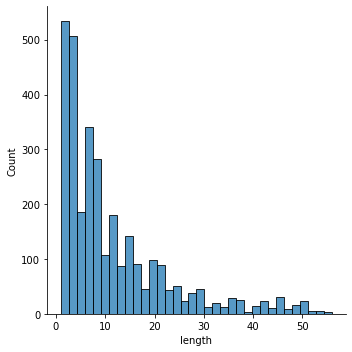

In [12]:
sns.displot(x=df['length'])

In [13]:
df['length'].describe()

count    3135.000000
mean       11.510686
std        11.265709
min         1.000000
25%         3.000000
50%         8.000000
75%        15.000000
max        56.000000
Name: length, dtype: float64

In [14]:
#meadian of tweets length
m = df['length'].median()
m

8.0

In [60]:
tweets = ['']
corpus=[]
for tweet in df['Text']:
    tweets.append(tweet)
    corpus.append(nltk.sent_tokenize(tweet))

In [61]:
corpus

[['the bird is freed'],
 ['Falcon rockets to orbit as seen from LA https://t.co/r8L2SbLC3p'],
 ['@Gfilche @Twitter 🤣'],
 ['@PeterSchiff 🤣 thanks'],
 ['@ZubyMusic Absolutely'],
 ['Dear Twitter Advertisers https://t.co/GMwHmInPAS'],
 ['@BillyM2k 👻'],
 ['Meeting a lot of cool people at Twitter today!'],
 ['Entering Twitter HQ – let that sink in!', 'https://t.co/D68z4K2wq7'],
 ['@dogeofficialceo @mtaibbi 🤣💪'],
 ['@mtaibbi 🤣'],
 ['@ARodTV Definitely closer to citizen journalism – local news orgs are under-appreciated &amp; should get way more prominence on Twitter'],
 ['@sandyleevincent Nobody bats 1000 🤷\u200d♂️'],
 ['A beautiful thing about Twitter is how it empowers citizen journalism – people are able to disseminate news without an establishment bias'],
 ['@teslaownersSV I’m a big fan of citizen journalism!'],
 ['“According to unnamed sources close to the matter who wish to remain anonymous” 🤣🤣'],
 ['“The New York Times has emerged as a new, chaotic actor in global politics.',
  'The pa

In [62]:
## flatten the list
corpus=[sent for sublist in corpus for sent in sublist]

In [63]:
for i in range(len(corpus)):
    corpus[i] = corpus[i].lower()
    corpus[i] = re.sub(r'(@[a-z0-9+._-]+)'," ", corpus[i]) # Replace @users by ' '
    corpus[i] = re.sub(r'\W+',' ',corpus[i]) # Replace everything non-alpahnumeric by ' '
    corpus[i] = re.sub(r'\s+',' ',corpus[i]) # Replace one or more whitespaces by  ' '
    corpus[i] = re.sub(r'\d+',' ',corpus[i]) # Replace one or more digits by  ' '
    corpus[i] = re.sub(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+)'," ", corpus[i]) # Replace e-mails by ' '
    
    # Replace urls by ''
    corpus[i] = re.sub(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', ' ' , corpus[i]) 
    # Replace html tags by ''
    corpus[i] = BeautifulSoup(corpus[i], 'html.parser').get_text().strip()

In [64]:
corpus

['the bird is freed',
 'falcon rockets to orbit as seen from la https t co r l sblc p',
 '',
 'thanks',
 'absolutely',
 'dear twitter advertisers https t co gmwhminpas',
 '',
 'meeting a lot of cool people at twitter today',
 'entering twitter hq let that sink in',
 'https t co d z k wq',
 '',
 '',
 'definitely closer to citizen journalism local news orgs are under appreciated amp should get way more prominence on twitter',
 'nobody bats',
 'a beautiful thing about twitter is how it empowers citizen journalism people are able to disseminate news without an establishment bias',
 'i m a big fan of citizen journalism',
 'according to unnamed sources close to the matter who wish to remain anonymous',
 'the new york times has emerged as a new chaotic actor in global politics',
 'the paper s interventions in some of the world s most combustible conflicts have sometimes been a boon but their messaging has also caused problems',
 '',
 'yes',
 'is a lot',
 'concerning',
 'works on any moving la

### Tokenizing the corpus

In [74]:
wordfreq = {}
for sentence in corpus:
    words = sentence.split()
    #tokens = nltk.word_tokenize(sentence) # To get the words, it can be also done with sentence.split()
    for word in words:
        if ( word not in wordfreq.keys() ): ## first time appearnce in the sentence
            wordfreq[word] = 1 # We initialize the corresponding counter
        else: ## if the world is already existed in the dictionalry 
            wordfreq[word] += 1 # We increase the corresponding counter

In [75]:
len(list(wordfreq.keys()))

6025

In [76]:
wordfreq.keys()

dict_keys(['the', 'bird', 'is', 'freed', 'falcon', 'rockets', 'to', 'orbit', 'as', 'seen', 'from', 'la', 'https', 't', 'co', 'r', 'l', 'sblc', 'p', 'thanks', 'absolutely', 'dear', 'twitter', 'advertisers', 'gmwhminpas', 'meeting', 'a', 'lot', 'of', 'cool', 'people', 'at', 'today', 'entering', 'hq', 'let', 'that', 'sink', 'in', 'd', 'z', 'k', 'wq', 'definitely', 'closer', 'citizen', 'journalism', 'local', 'news', 'orgs', 'are', 'under', 'appreciated', 'amp', 'should', 'get', 'way', 'more', 'prominence', 'on', 'nobody', 'bats', 'beautiful', 'thing', 'about', 'how', 'it', 'empowers', 'able', 'disseminate', 'without', 'an', 'establishment', 'bias', 'i', 'm', 'big', 'fan', 'according', 'unnamed', 'sources', 'close', 'matter', 'who', 'wish', 'remain', 'anonymous', 'new', 'york', 'times', 'has', 'emerged', 'chaotic', 'actor', 'global', 'politics', 'paper', 's', 'interventions', 'some', 'world', 'most', 'combustible', 'conflicts', 'have', 'sometimes', 'been', 'boon', 'but', 'their', 'messaging

In [77]:
type(wordfreq)

dict

In [1]:
#remove words with lenght less than 2, but keeping 'ok'
wordfreq = dict((key,wordfreq[key]) for key in w if len(key)>2 or key== 'ok')

NameError: name 'w' is not defined

In [79]:
type(wordfreq)

dict

In [80]:
len(list(wordfreq.keys()))

5787

In [89]:
#Reduce the corpus by removung stopwords

from nltk.corpus import stopwords

stop_words = list(stopwords.words('english'))

In [90]:
#Cleaning stop words (i.e : you vs you're)
for i in range(len(stop_words)):
    stop_words[i] = re.sub(r"\s*'\s*\w*","",stop_words[i])

#stop_words = [word for word in list(np.unique(stop_words)) if len(word) > 1]
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 'you',
 'you',
 'you',
 'you',
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 'she',
 'her',
 'hers',
 'herself',
 'it',
 'it',
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 'that',
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each',
 'few',
 'more'

In [91]:
#drop stop words from bag
corpus = [(wordfreq[key],key) for key in list(wordfreq.keys()) if key not in stop_words]

In [92]:
corpus

[(1, 'bird'),
 (1, 'freed'),
 (21, 'falcon'),
 (5, 'rockets'),
 (32, 'orbit'),
 (12, 'seen'),
 (400, 'https'),
 (1, 'sblc'),
 (22, 'thanks'),
 (24, 'absolutely'),
 (1, 'dear'),
 (100, 'twitter'),
 (4, 'advertisers'),
 (1, 'gmwhminpas'),
 (3, 'meeting'),
 (40, 'lot'),
 (22, 'cool'),
 (100, 'people'),
 (16, 'today'),
 (1, 'entering'),
 (24, 'let'),
 (7, 'sink'),
 (12, 'definitely'),
 (3, 'closer'),
 (5, 'citizen'),
 (6, 'journalism'),
 (4, 'local'),
 (17, 'news'),
 (2, 'orgs'),
 (5, 'appreciated'),
 (282, 'amp'),
 (34, 'get'),
 (38, 'way'),
 (1, 'prominence'),
 (3, 'nobody'),
 (1, 'bats'),
 (8, 'beautiful'),
 (22, 'thing'),
 (1, 'empowers'),
 (9, 'able'),
 (1, 'disseminate'),
 (14, 'without'),
 (2, 'establishment'),
 (4, 'bias'),
 (30, 'big'),
 (7, 'fan'),
 (4, 'according'),
 (1, 'unnamed'),
 (3, 'sources'),
 (11, 'close'),
 (10, 'matter'),
 (6, 'wish'),
 (3, 'remain'),
 (2, 'anonymous'),
 (28, 'new'),
 (1, 'york'),
 (33, 'times'),
 (1, 'emerged'),
 (1, 'chaotic'),
 (1, 'actor'),
 (9, 'g

In [93]:
corpus.sort(reverse = True)
corpus

[(400, 'https'),
 (282, 'amp'),
 (153, 'tesla'),
 (103, 'would'),
 (102, 'good'),
 (100, 'twitter'),
 (100, 'people'),
 (83, 'yes'),
 (81, 'much'),
 (80, 'starlink'),
 (76, 'one'),
 (75, 'true'),
 (69, 'many'),
 (68, 'like'),
 (67, 'even'),
 (66, 'great'),
 (62, 'time'),
 (61, 'also'),
 (55, 'yeah'),
 (55, 'exactly'),
 (52, 'spacex'),
 (52, 'next'),
 (52, 'make'),
 (51, 'year'),
 (51, 'think'),
 (50, 'still'),
 (50, 'haha'),
 (49, 'maybe'),
 (48, 'high'),
 (45, 'probably'),
 (44, 'team'),
 (43, 'years'),
 (43, 'work'),
 (43, 'far'),
 (42, 'earth'),
 (41, 'right'),
 (41, 'car'),
 (40, 'lot'),
 (40, 'day'),
 (38, 'way'),
 (38, 'russia'),
 (38, 'real'),
 (38, 'life'),
 (38, 'better'),
 (37, 'world'),
 (35, 'ukraine'),
 (34, 'get'),
 (34, 'beta'),
 (34, 'actually'),
 (33, 'times'),
 (33, 'long'),
 (32, 'orbit'),
 (32, 'future'),
 (31, 'working'),
 (31, 'first'),
 (31, 'best'),
 (30, 'need'),
 (30, 'know'),
 (30, 'big'),
 (30, 'almost'),
 (29, 'ok'),
 (29, 'hard'),
 (29, 'fsd'),
 (28, 'yup'

In [94]:
len(corpus)

5680

### Stemming

In [95]:
from nltk.stem import WordNetLemmatizer
nltk.download('omw-1.4')
lem = WordNetLemmatizer()

corpus = [(lem.lemmatize(word[1]),word[0]) for word in corpus]
corpus

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\javie\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


[('http', 400),
 ('amp', 282),
 ('tesla', 153),
 ('would', 103),
 ('good', 102),
 ('twitter', 100),
 ('people', 100),
 ('yes', 83),
 ('much', 81),
 ('starlink', 80),
 ('one', 76),
 ('true', 75),
 ('many', 69),
 ('like', 68),
 ('even', 67),
 ('great', 66),
 ('time', 62),
 ('also', 61),
 ('yeah', 55),
 ('exactly', 55),
 ('spacex', 52),
 ('next', 52),
 ('make', 52),
 ('year', 51),
 ('think', 51),
 ('still', 50),
 ('haha', 50),
 ('maybe', 49),
 ('high', 48),
 ('probably', 45),
 ('team', 44),
 ('year', 43),
 ('work', 43),
 ('far', 43),
 ('earth', 42),
 ('right', 41),
 ('car', 41),
 ('lot', 40),
 ('day', 40),
 ('way', 38),
 ('russia', 38),
 ('real', 38),
 ('life', 38),
 ('better', 38),
 ('world', 37),
 ('ukraine', 35),
 ('get', 34),
 ('beta', 34),
 ('actually', 34),
 ('time', 33),
 ('long', 33),
 ('orbit', 32),
 ('future', 32),
 ('working', 31),
 ('first', 31),
 ('best', 31),
 ('need', 30),
 ('know', 30),
 ('big', 30),
 ('almost', 30),
 ('ok', 29),
 ('hard', 29),
 ('fsd', 29),
 ('yup', 28),


In [96]:
len(corpus)

5680

In [97]:
type(corpus)

list

In [98]:
corpus[33]

('far', 43)